# Exercise 3 : Exploratory Analysis


## Objective:
In this Lab Exercise, our main goal is to analyze the most relevant numeric and categorical variables in the given dataset,
which may affect the sale price of a house, and hence, will be most relevant in predicting “SalePrice”. You will extract
some variables, perform statistical exploration and visualization, and try to analyze their relationship with “SalePrice”.
In addition, you will also try to answer a few specific questions on the dataset using basics of Exploratory Data Analysis.

---

### Preparation and Libraries Import
Import numpy, pandas, seaborn, matplotlib.

In [97]:
import numpy as py
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #we only need pyplot
sb.set() #Set the default seaborn style for graphics

Import training dataset as df

In [98]:
trainData = pd.read_csv("train.csv")
trainData.head(n = 10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


---

### Problem 1: Analysis of Numeric Variables
In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.  
                            ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']  

Get the sales price data  from each col in imported trainData.


In [99]:
#Store into relevant data frames
salePrice = trainData["SalePrice"]

#Data in question that we want to analyse the relationship with
lotArea = trainData["LotArea"]
totalBsmtSF = trainData["TotalBsmtSF"]
garageArea = trainData["GarageArea"]
grLivArea = trainData["GrLivArea"]



---
<b> a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

<AxesSubplot:>

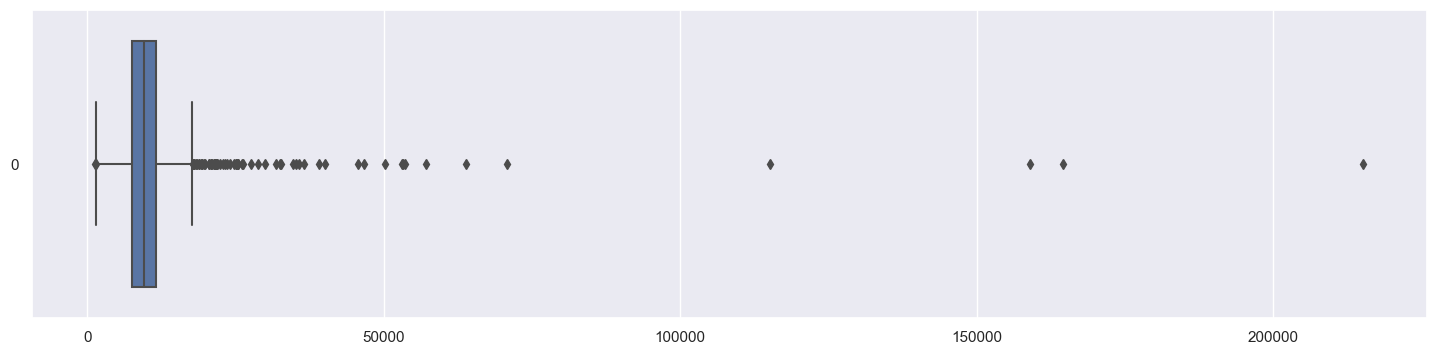

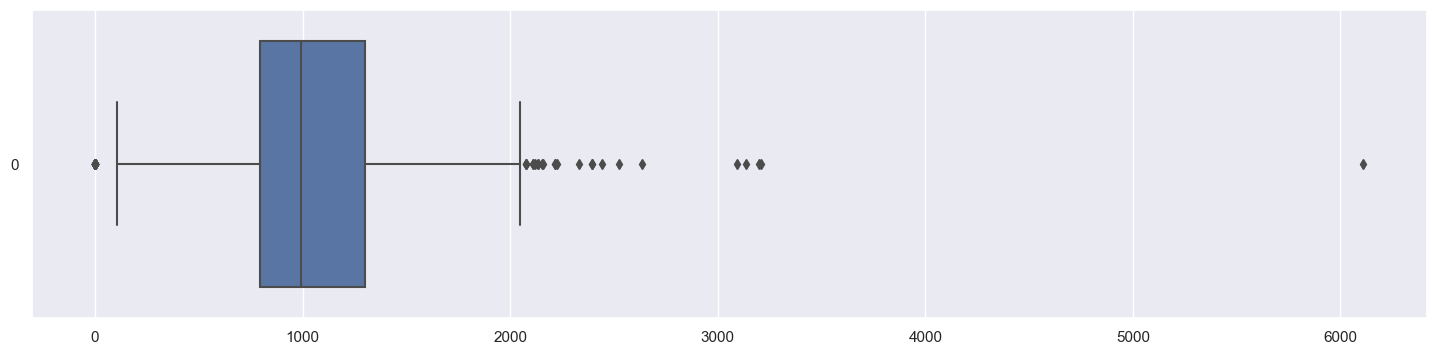

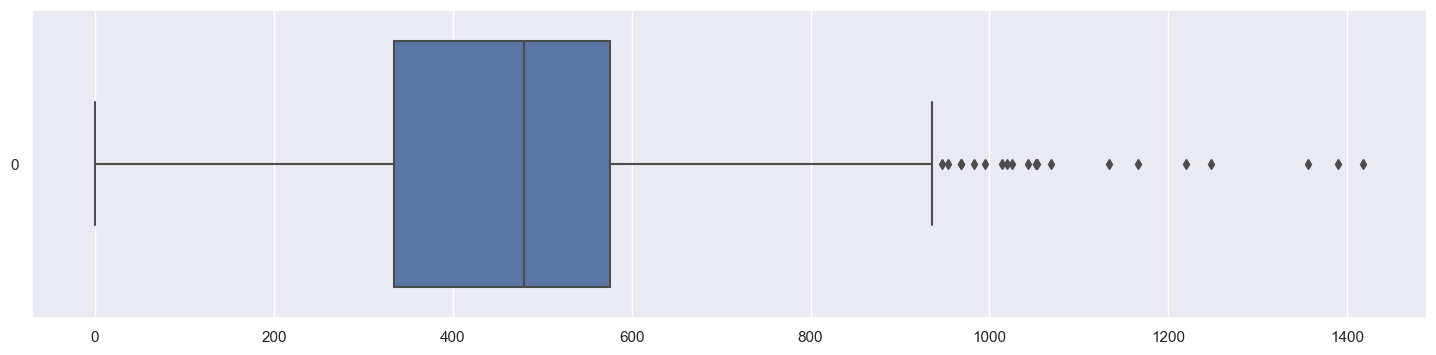

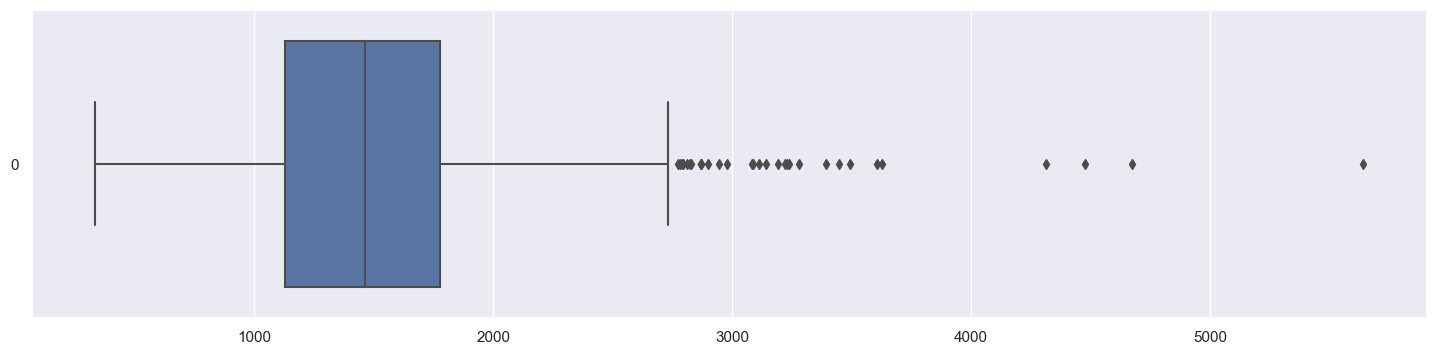

In [100]:
#Plot each of the data using the box plot to get a representation of the data
f = plt.figure(figsize = (18,4)) #Need this to be written 4 times to render 4 box plots
#Plot each box plot
sb.boxplot(data = lotArea, orient= 'h') 
f = plt.figure(figsize = (18,4))
sb.boxplot(data = totalBsmtSF, orient = 'h')
f = plt.figure(figsize = (18,4))
sb.boxplot(data = garageArea, orient = 'h')
f = plt.figure(figsize = (18,4))
sb.boxplot(data = grLivArea, orient = 'h')


The box plots are plotted in order as follows:
1. LotArea
2. TotalBsmtSF
3. GarageArea
4. GrLivArea

It is relatively unreliable and difficult to compare the box plots at face value since the axis range on the x-axis is not consistent for all variables. However, we can intuitively see that LotArea has a large amount of outliers. Let's find out how many outliers are each in of the variables.

In [101]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

#Print the results of outliers in each df
print("There are {0} outliers in LotArea.".format(countOutliers(lotArea)))
print("There are {0} outliers in TotalBsmtSF.".format(countOutliers(totalBsmtSF)))
print("There are {0} outliers in GrLivArea.".format(countOutliers(grLivArea)))
print("There are {0} outliers in GarageArea.".format(countOutliers(garageArea)))


There are 69 outliers in LotArea.
There are 61 outliers in TotalBsmtSF.
There are 31 outliers in GrLivArea.
There are 21 outliers in GarageArea.


We can see that LotArea indeed has the most amount of outliers that was inferred from the box plot, with a number of 69.

---
<b> b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

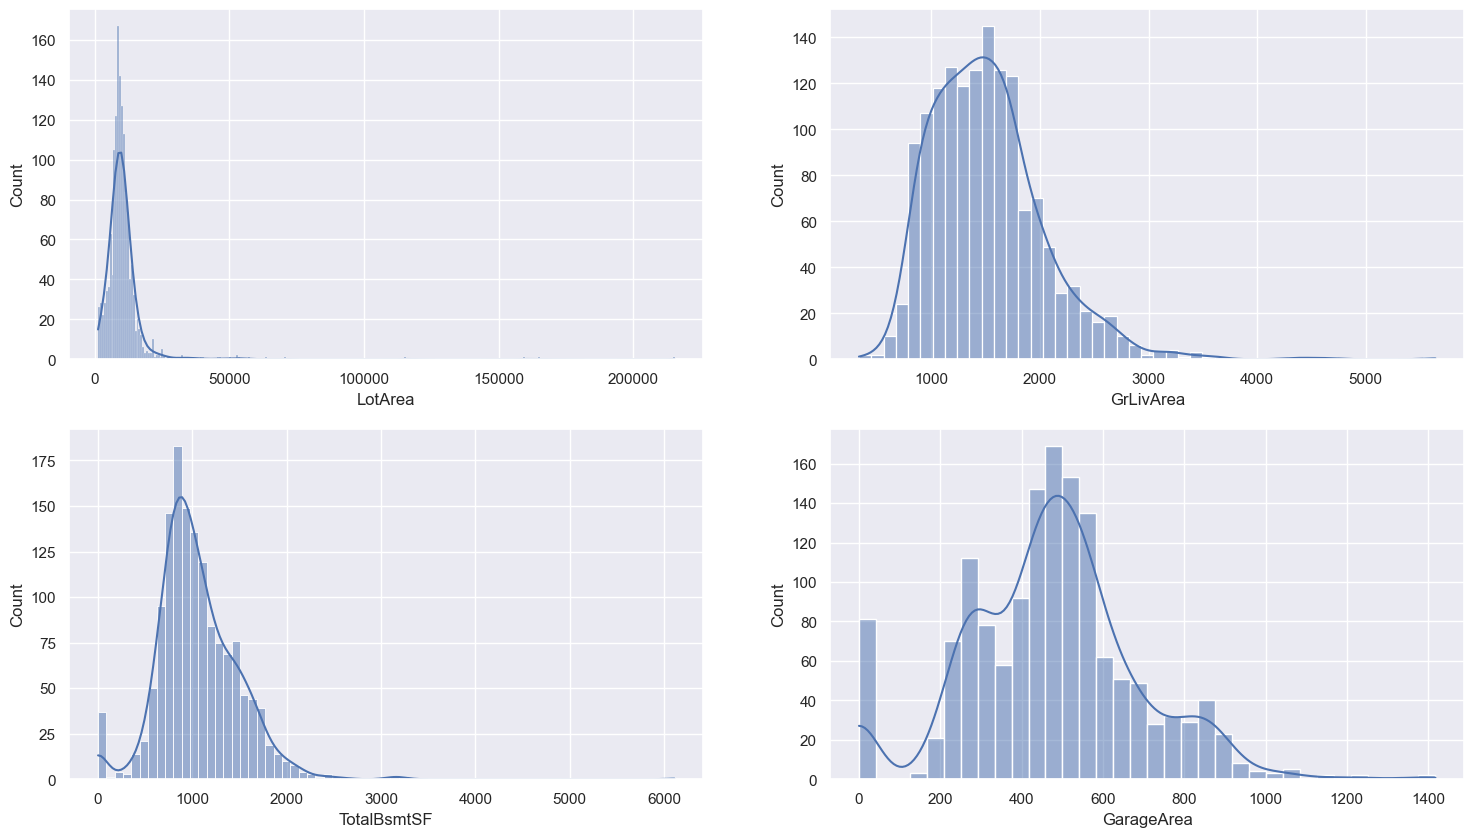

In [102]:
#Draw the hist plots of each df to visualize the skewness of each df in question.
#4 dfs, so 2 by 2 will do
f, axes = plt.subplots(2,2, figsize = (18,10))

#Plot the histogram with KDEs to see the frequency and curve
sb.histplot(data = lotArea, kde = True, ax = axes[0,0])
sb.histplot(data = grLivArea, kde = True, ax = axes[0,1])
sb.histplot(data = totalBsmtSF, kde = True, ax = axes[1,0])
sb.histplot(data = garageArea, kde = True, ax = axes[1,1])

From the plotted histograms, we can see that <b> 'LotArea' </b> is the most skewed from a regular distribution. It is heavily positively skewed.

In [103]:
#Check the skewness of each graph as well to confirm my visualisations
print("LotArea skew: ", lotArea.skew(axis = 0, skipna = True))
print("GarageArea skew: ",garageArea.skew(axis = 0, skipna = True))
print("TotalBsmtSF skew: ",totalBsmtSF.skew(axis = 0, skipna = True))
print("GrLivArea skew: ",grLivArea.skew(axis = 0, skipna = True))

LotArea skew:  12.207687851233496
GarageArea skew:  0.17998090674623907
TotalBsmtSF skew:  1.5242545490627664
GrLivArea skew:  1.3665603560164552


It is indeed true that <b> 'LotArea' </b> is heavily positively skewed with a skew value of ~12.207...

---
<b>c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data. </b>

To do this, we calculate the correlation of SalePrice to each variable to evaluate the significance of it.

The correlation of SalesPrice to LotArea is:  0.26384335387140556
The correlation of SalesPrice to GarageArea is:  0.623431438918362
The correlation of SalesPrice to GrLivArea is:  0.708624477612652
The correlation of SalesPrice to TotalBsmtSF is:  0.6135805515591956


<AxesSubplot:>

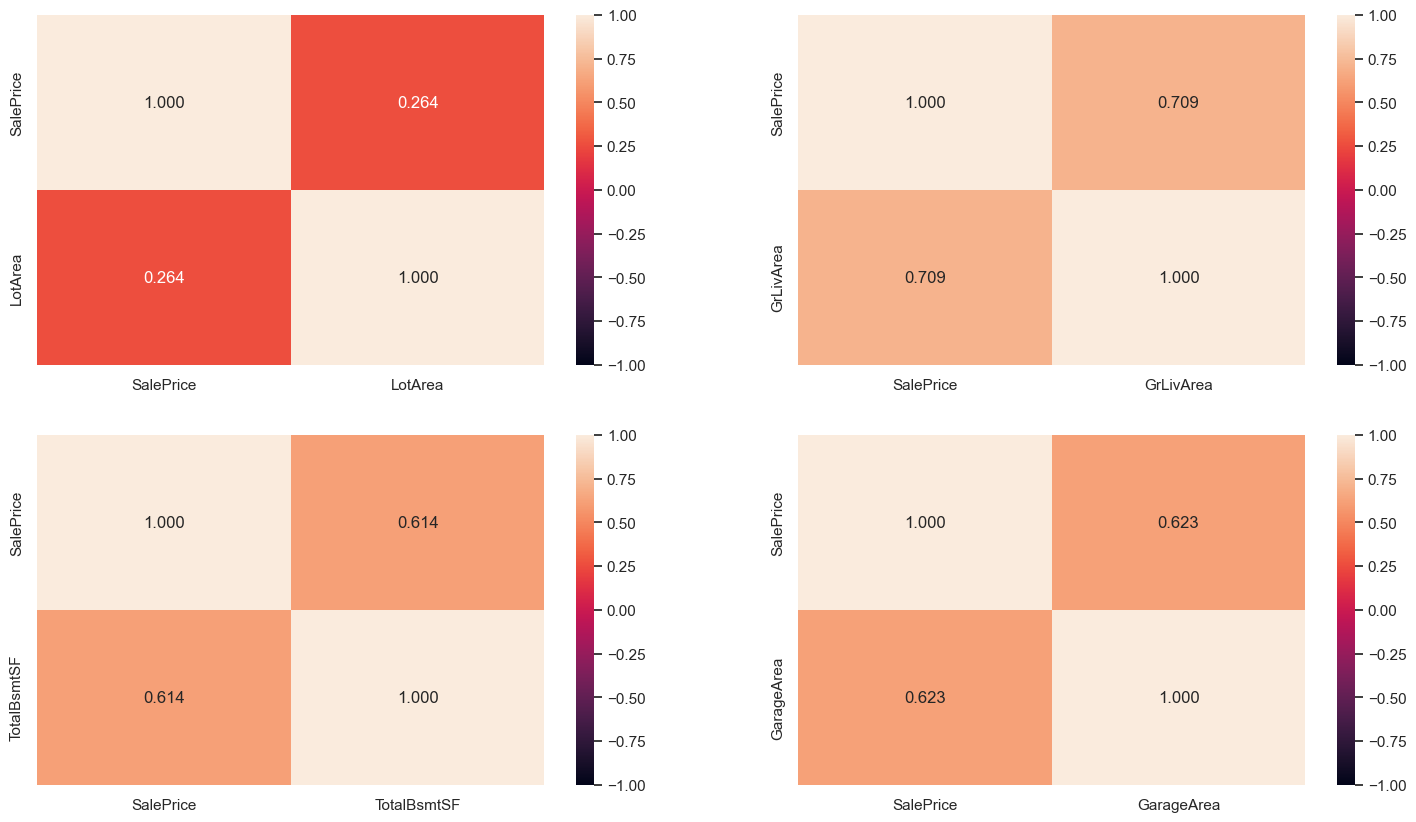

In [104]:
#Print the correlation of sales price to each df, and get the heatmap

print("The correlation of SalesPrice to LotArea is: ", salePrice.corr(lotArea))
print("The correlation of SalesPrice to GarageArea is: ", salePrice.corr(garageArea))
print("The correlation of SalesPrice to GrLivArea is: ", salePrice.corr(grLivArea))
print("The correlation of SalesPrice to TotalBsmtSF is: ", salePrice.corr(totalBsmtSF))

#Then lets plot a combined heatmap to see it visually how it correlates to sale price

f, axes = plt.subplots(2,2, figsize = (18,10))
       # df = pd.concat([salePriceDF,pd.DataFrame(floatIntDF[col])], axis =1).reindex(floatIntDF.index)
#Plot the histogram with KDEs to see the frequency and curve
sb.heatmap(data = pd.concat([salePrice, lotArea], axis = 1).reindex(salePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".3f", ax = axes[0,0])
sb.heatmap(data = pd.concat([salePrice, grLivArea], axis = 1).reindex(salePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".3f", ax = axes[0,1])
sb.heatmap(data = pd.concat([salePrice, totalBsmtSF], axis = 1).reindex(salePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".3f", ax = axes[1,0])
sb.heatmap(data = pd.concat([salePrice, garageArea], axis = 1).reindex(salePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".3f", ax = axes[1,1])


Based on the values that have been acquired from the calculation and the visualisation from the box plots, it seems that the top two variables that I think would help us the most in predicting SalesPrice is <b>'GrLivArea'</b> and <b>'GarageArea'</b> as they are highest in correlations to SalesPrice among the four tested.  
However, it is also to be noted that both the variables I have chosen also had the lowest number of outliers, <b>'GrLivArea'</b> had 31 outliers, <b>'GarageArea'</b> had 21 outliers.  
Even though TotalBsmtSF follows closely behind in correlation to 'GarageArea' at ~0.614, it had a larger number of outliers, and hence <b>'GrLivArea'</b> and <b>'GarageArea'</b> is the most suitable to predict SalesPrice for this problem.

---

### Problem 2 : Analysis of Categorical Variables

In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.  
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']


---
<b> a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses? </b>

In [105]:
#Store data into relevant dfs
MSSubClass = trainData["MSSubClass"]
Neighborhood = trainData["Neighborhood"]
BldgType = trainData["BldgType"]
OverallQual = trainData["OverallQual"]

After inspection of the data_description file, one can see that:

|Data  |Levels  |
|--|--|
| MSSubClass | 16 |
| Neighborhood |25  |
| BldgType | 5 |
| OverallQual | 10 |  

It seems that the variable with the highest number of levels is <b> "Neighborhood" </b>, with a number of 25 levels.  
We want to find the level with the highest number of houses in "Neighborhood".


<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

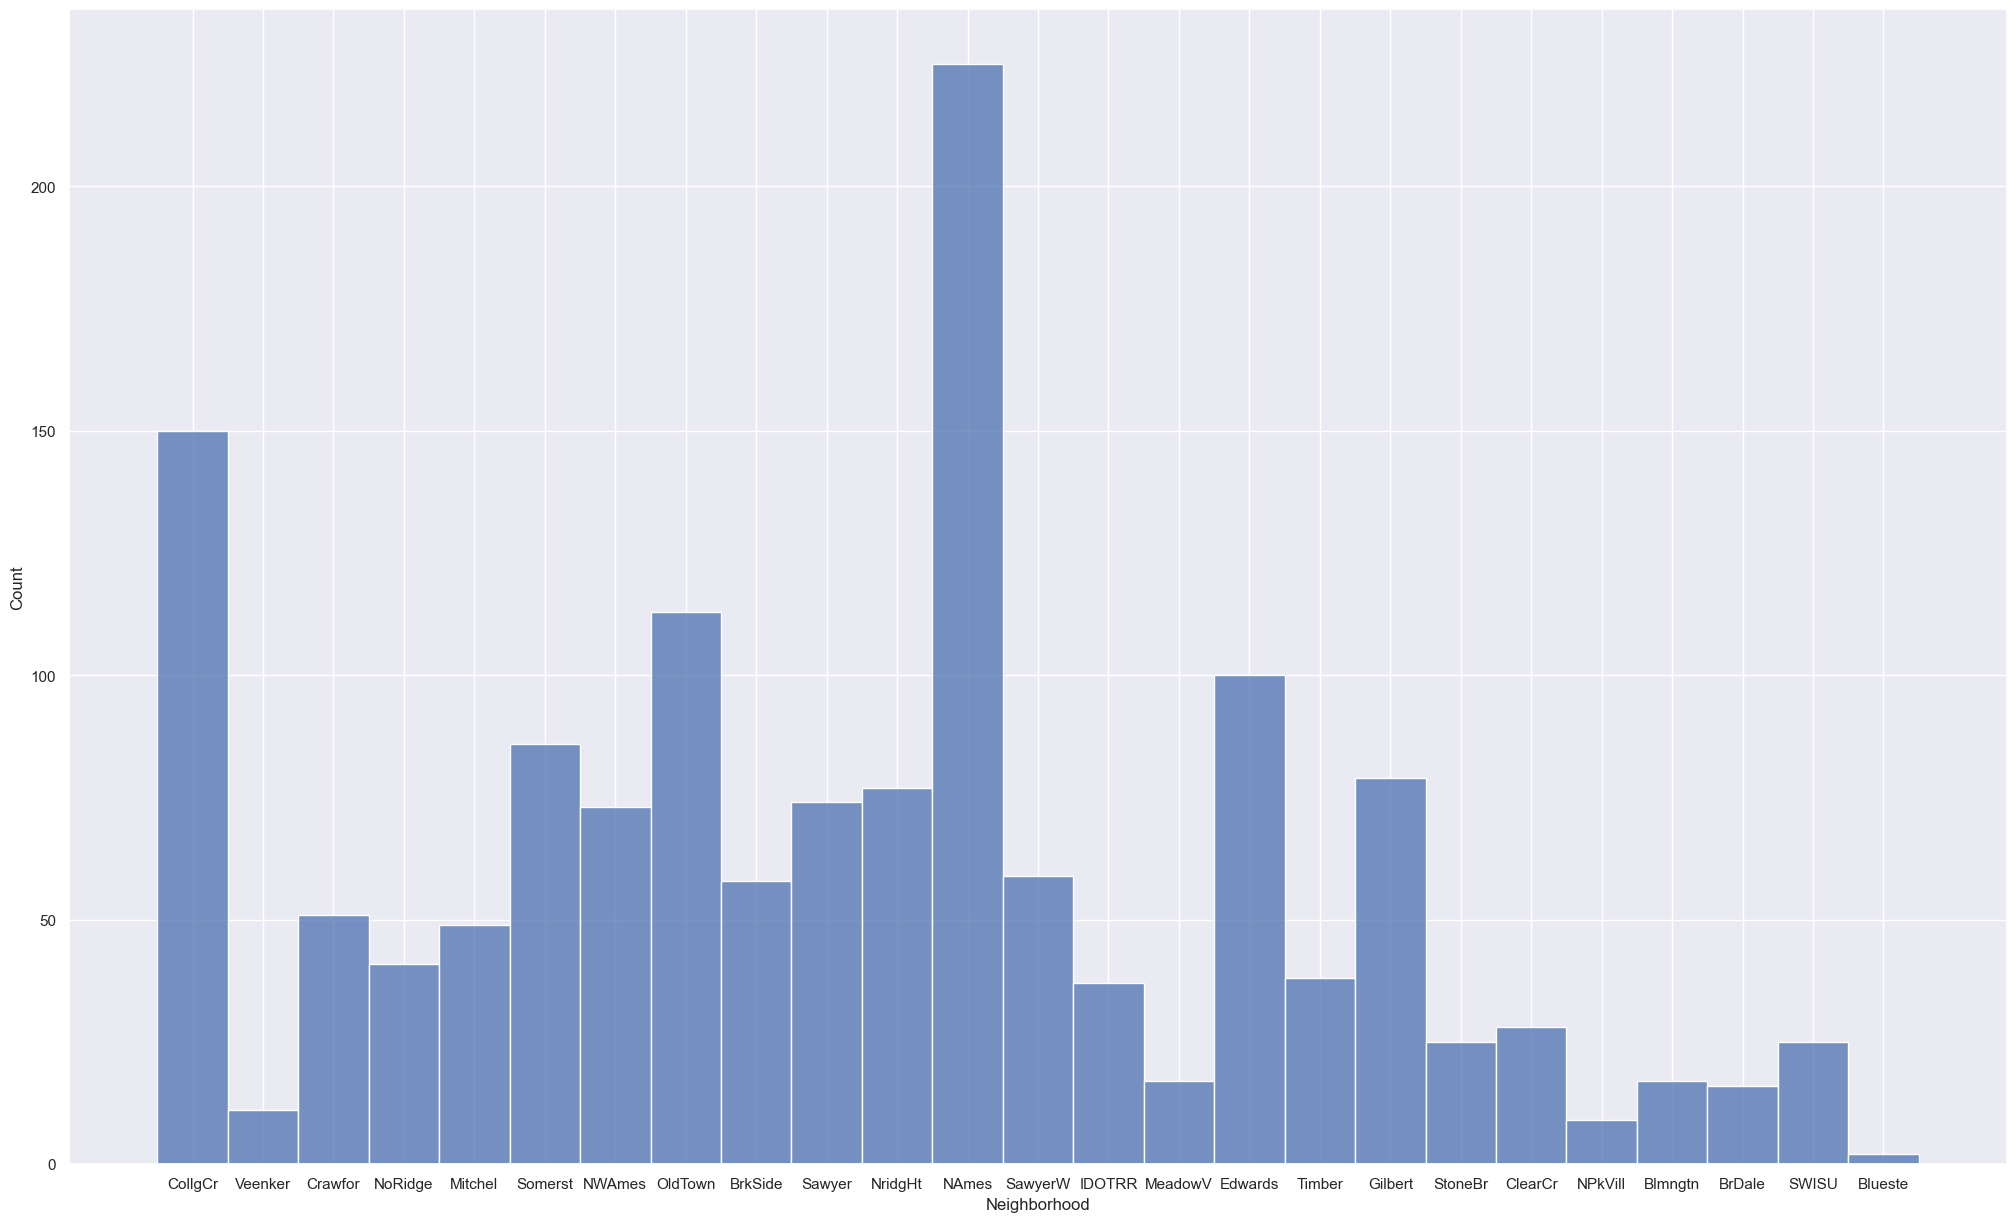

In [106]:
#Plot the data in neighborhood using hist plot to see the frequency of each level
f = plt.figure(figsize = (25,15))
sb.histplot(data = Neighborhood)

It seems the level <b> 'NAmes' </b> has the most number of houses. Let us find exactly how much by using describe()

In [107]:
Neighborhood.describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

It is indeed true that the top value is <b> 'NAmes' </b>, with a count of 225.

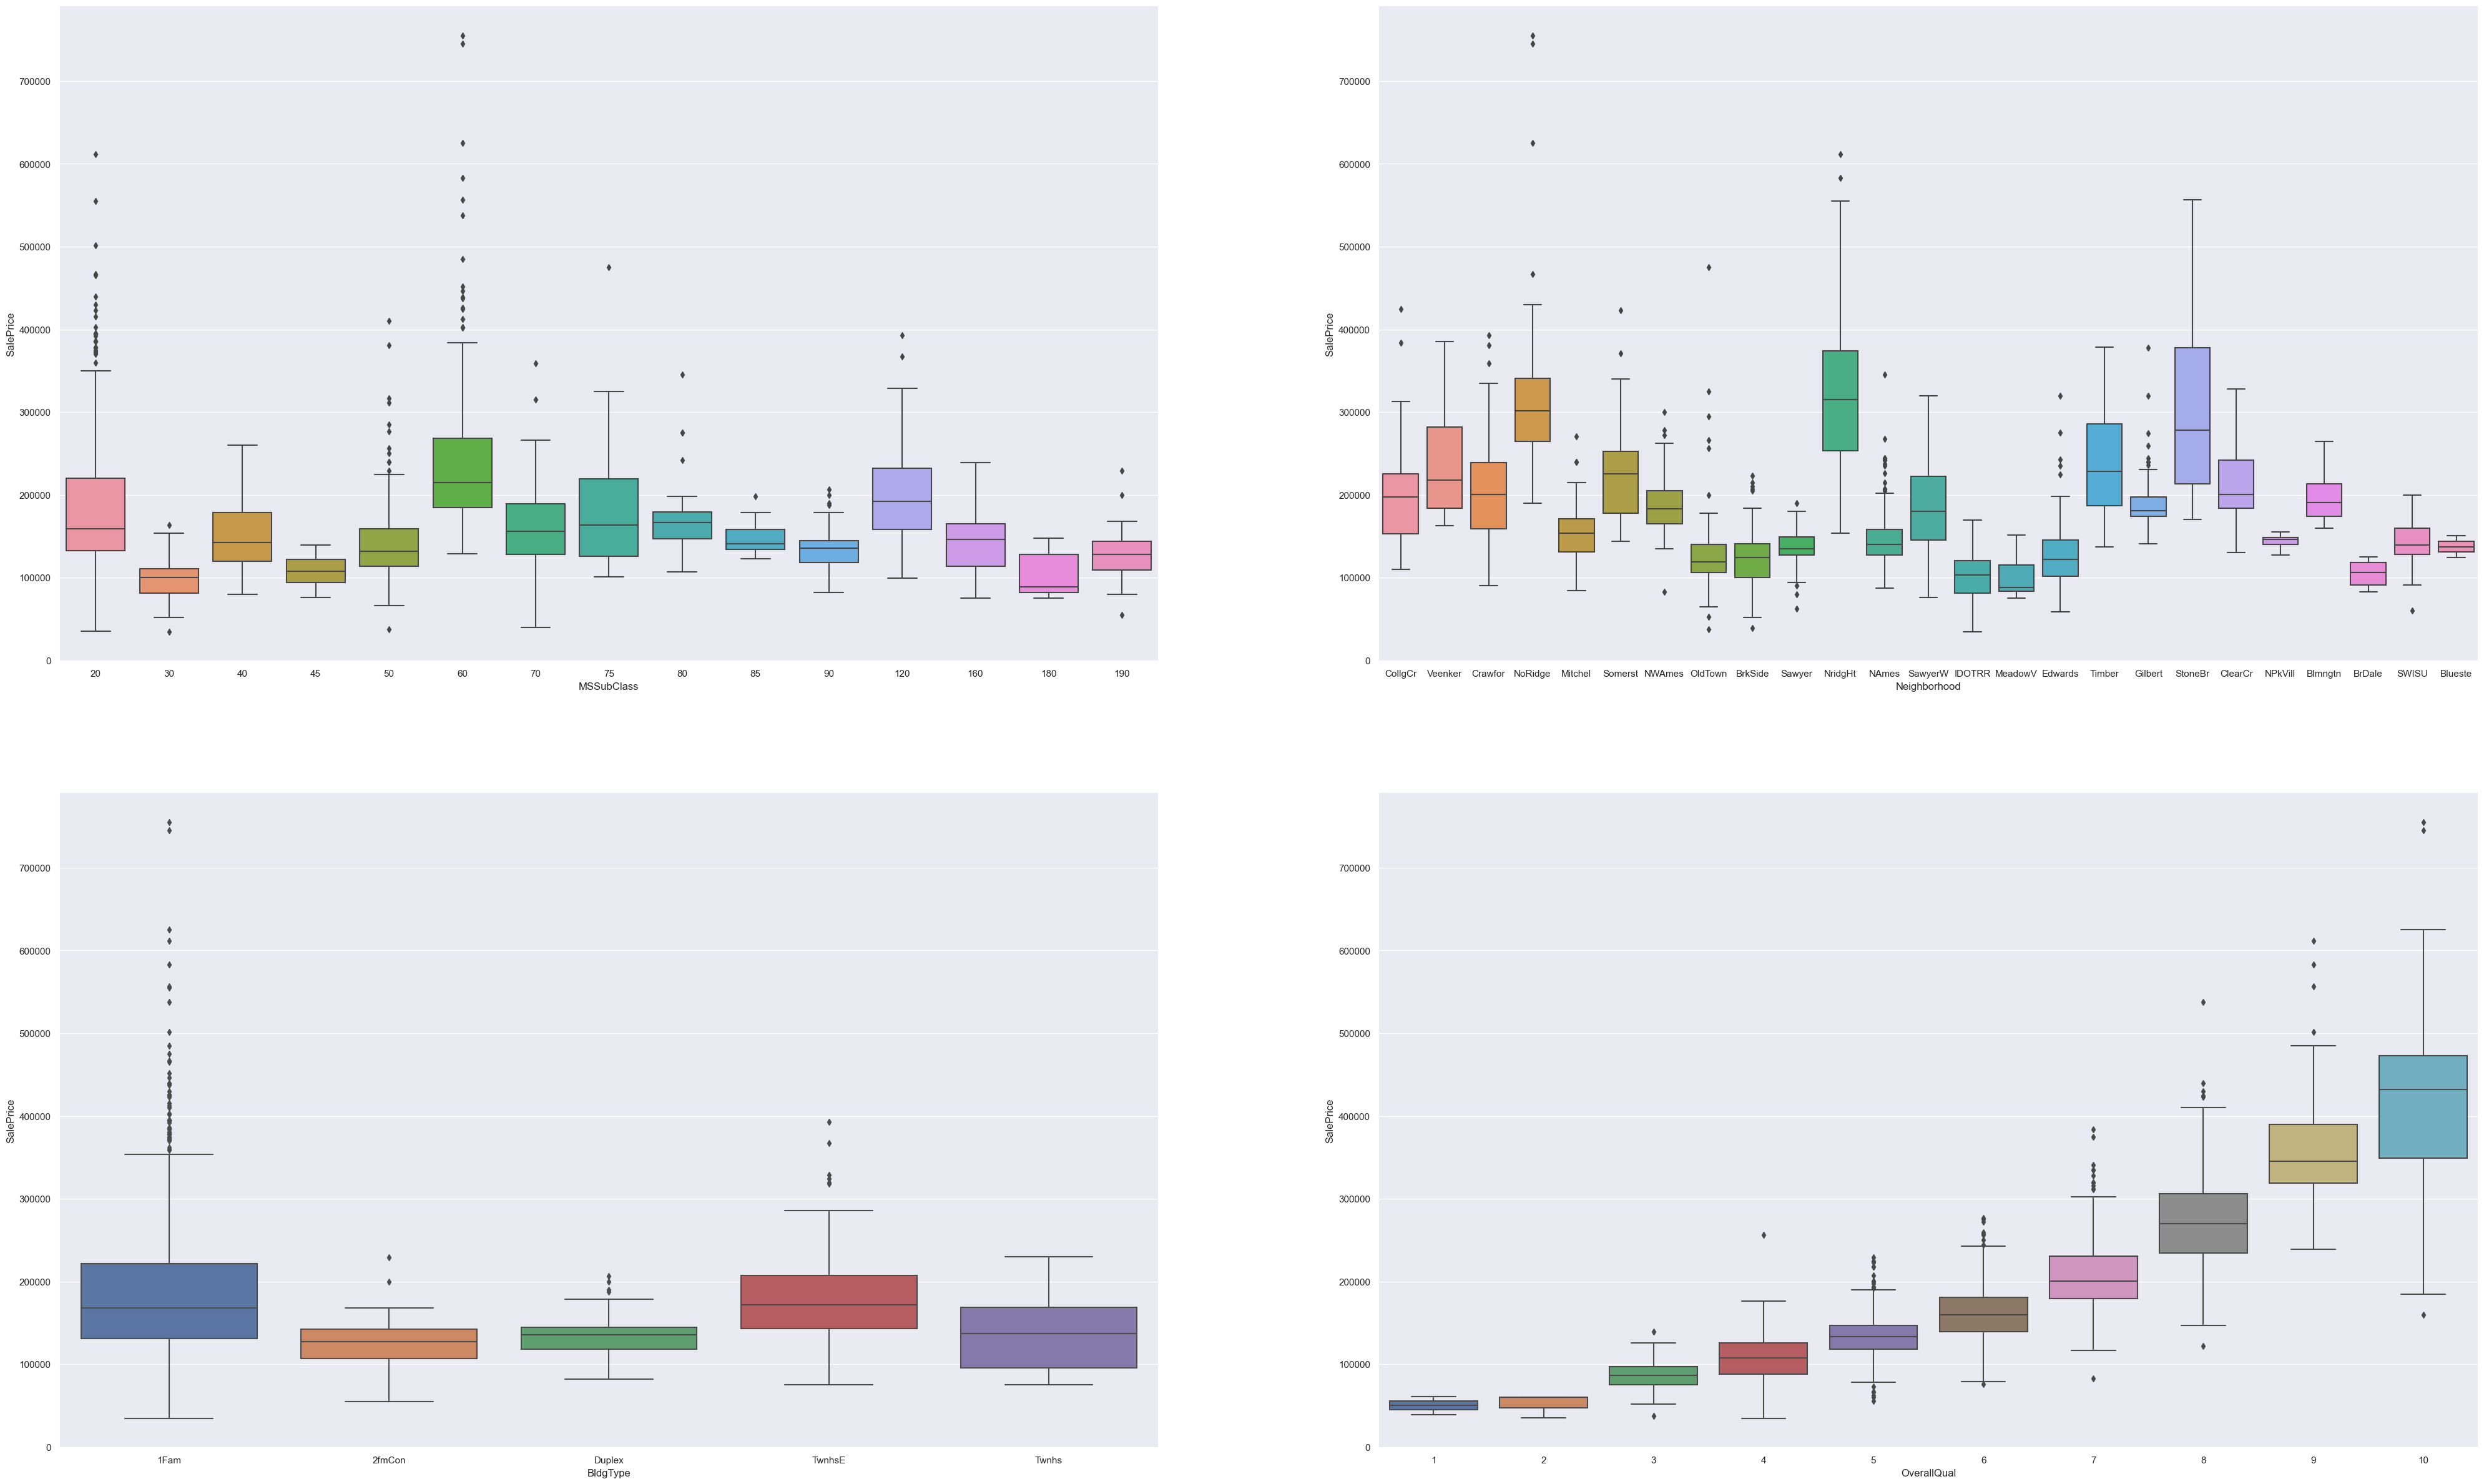

In [108]:
#We can no longer use a heatmap or correlation value to determine it as the data is now categorical.
#We shall try to visualize it using a box plot to determine the relationships among each level in each data itself.
f,axes = plt.subplots(2,2, figsize = (50,30))

#We are using the train data, and getting the x and y values from it for each data and plotting it in 2x2
sb.boxplot(data = trainData, x = "MSSubClass", y = "SalePrice", ax = axes[0,0]);
sb.boxplot(data = trainData ,x = "Neighborhood", y = "SalePrice", ax = axes[0,1]);
sb.boxplot(data = trainData, x = "BldgType", y = "SalePrice", ax = axes[1,0]);
sb.boxplot(data = trainData, x = "OverallQual", y = "SalePrice", ax = axes[1,1]);


Judging from the above plots, the two top variables I choose that I think would help us the most in predicting 'SalePrice' of houses is <b> 'OverallQual' and 'Neighbourhood'. </b>  
</br>
I chose <b>'OverallQual'</b> as each level of <b>'OverallQual'</b> is positively correlated with <b>'SalePrice'</b>, that is we can see an upward trend in <b>'SalePrice'</b> as the level increases. This means that it should be easier to predict it's price if we know a certain house's level in <b>OverallQual</b>.  
<br/>
I chose <b> Neighborhood </b> as I think it is a more reliable predictor than <b>'MSSubClass' </b>. It can be observed that they now do not have the easy upward trending shape like OverallQual, and both follow this 'bell-like' pattern. Hence, I also observed that <b>'Neighborhood'</b> has significantly lesser outliers than <b> 'MSSubClass' </b>. Also, since its categorical data, then it is easier to predict the SalePrice if we have data on the average/mean or other related data on each neighbourhood, so if we know a certain house's neighborhood, we can use those data to do our prediction. Since 'Neighborhood' also has lesser outliers, then the mean/average and other related data like distribution would also be a more reliable indicator too.  
</br>
Hence, the two variables I have chosen are <b>'OverallQual' and 'Neighborhood' </b>

---

### Problem 3 : Interesting Questions for EDA

<b>b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.</b>  

<br>
Referencing the data_description file, there are three variables that are related to the problem. 

1) YearBuilt: Original construction date
2) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
3) YrSold: Year Sold (YYYY)


In [188]:
#Clean and drop values that are not needed for our analysis
#We drop those data that have the same year built and year remod add as these houses have neber been remodelled
cleanedDf = trainData.drop(trainData[trainData["YearBuilt"] == trainData["YearRemodAdd"]].index)

#Are there any houses that were remodelled after being sold?
# count = 0;
# for data in trainData["YearRemodAdd"]:
#     if(data > trainData["YrSold"].loc[count]):
#         print(data,trainData["YrSold"].loc[count])
#         count+=1
#We also want to exclude any houses that were remodelled after it was sold
cleanedDf = cleanedDf.drop(cleanedDf[cleanedDf["YearRemodAdd"] > cleanedDf["YrSold"]].index)

#Helpful variable from the lecture slides
#houseAge = cleanedDf["YrSold"] - cleanedDf["YearBuilt"]

#This variable is the house "new" age after being remodelled, so it is the amount of years a house gets sold after being remodelled.
houseAge = cleanedDf["YrSold"] - cleanedDf["YearRemodAdd"]

,HouseAge
2,6
3,36
5,14
6,2
8,58
...,...
1454,4
1455,7
1456,22
1457,4


Using houseAge, I predict that it would be negatively correlated with SalePrice as the older(higher the houseAge) the house, the lower the value of the house. For this, let us find out the correlation between both variables and find it's correlation.

Correlation of SalePrice and HouseAge:  -0.4502294083841026


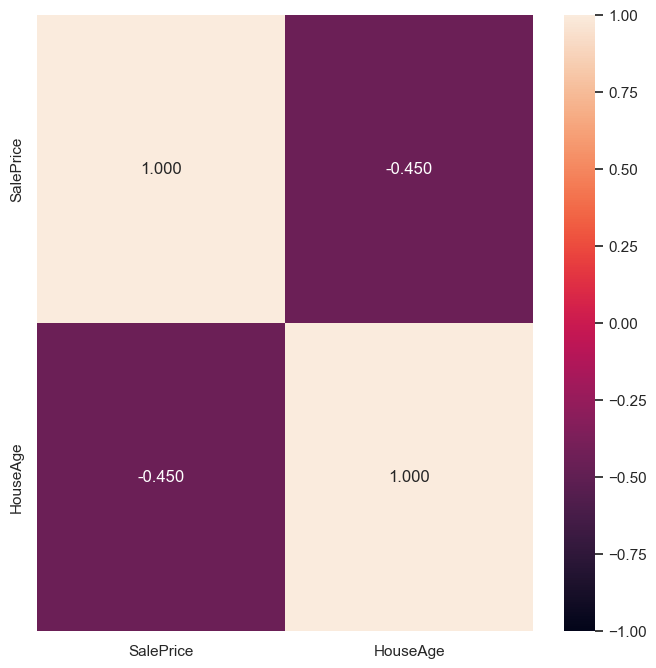

<Figure size 2000x500 with 0 Axes>

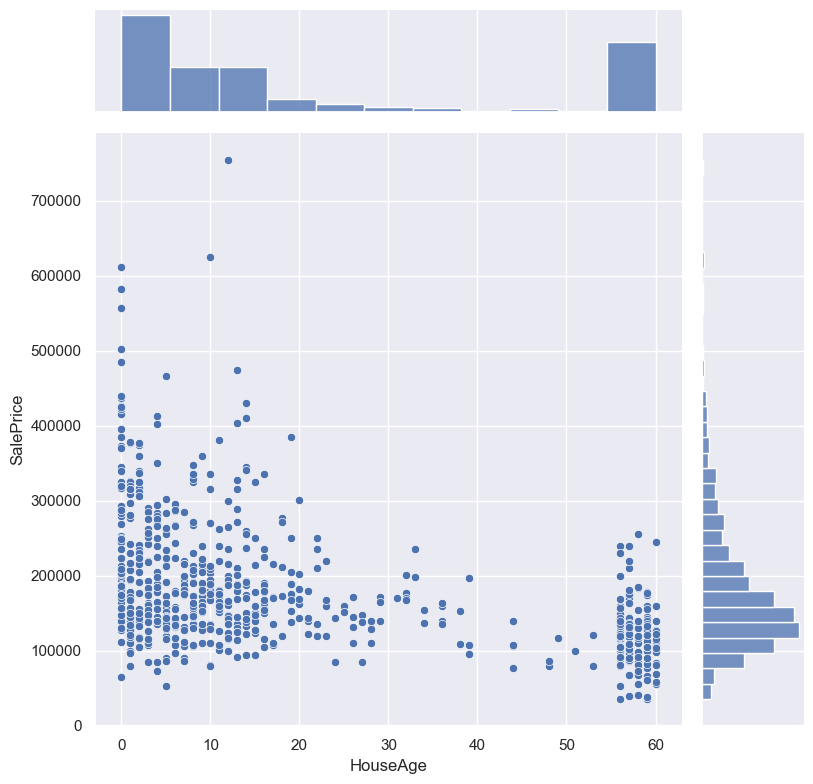

In [198]:
#Let's find the correlation and plot the heatmap
print("Correlation of SalePrice and HouseAge: ", salePrice.corr(houseAge))

#The DF containing both sale price and house age
resultDF = pd.concat([cleanedDf["SalePrice"], pd.DataFrame(houseAge)], axis = 1).reindex(salePrice.index)

# Rename second column to be house age
resultDF.rename(columns = {0: 'HouseAge'}, inplace = True)

#Plot the heatmap to show correlation
f = plt.figure(figsize = (8,8))
sb.heatmap(data = resultDF.corr(), vmin = -1, vmax= 1, annot = True, fmt = ".3f")

#Then plot a joint plot (both numeric values) to see the relationship between houseage and sale price
f = plt.figure(figsize = (20,5))
sb.jointplot(data = resultDF, x = "HouseAge", y = "SalePrice", height = 8)

To further reinforce our prediction, let us use a regplot to plot data and see the linear regression model fit.

<AxesSubplot:xlabel='houseAge', ylabel='SalePrice'>

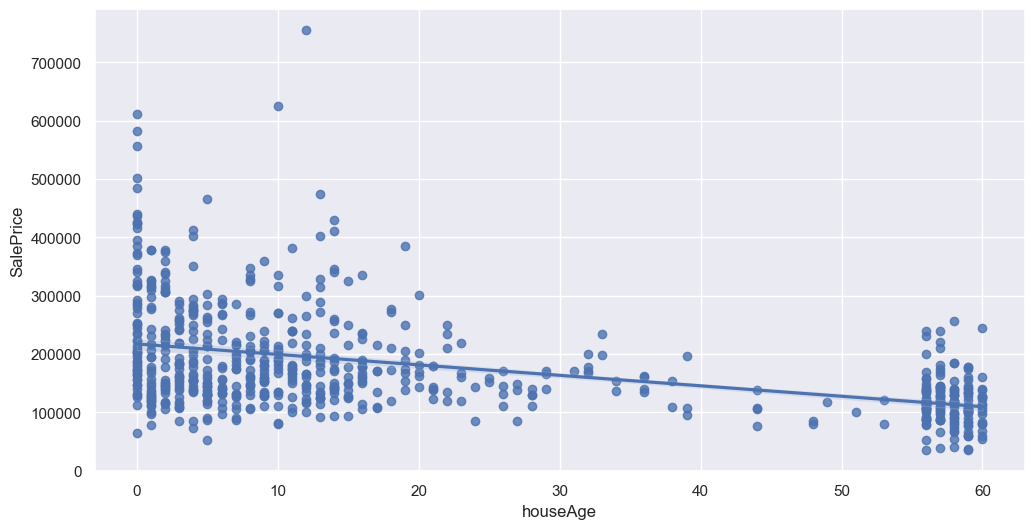

In [204]:
f = plt.figure(figsize = (12,6))
xData = pd.Series(houseAge, name = "houseAge");
yData = pd.Series(cleanedDf["SalePrice"], name = "SalePrice")
sb.regplot(x = xData, y = yData)